In [1]:
!pip install fastcore
!pip install fastai

  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/24/21/7d397a4b7934ff4028987914ac1044d3b7d52712f30e2ac7a2ae5bc86dd0/typing_extensions-4.8.0-py3-none-any.whl.metadata
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.
tensorflow-probability 0.21.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [2]:
from fastcore.all import *
import time
from fastai.vision.all import *
import pandas as pd
import numpy as np
import os

In [3]:
searches = 'Glaucoma', 'Cataracts', 'Uveitis', 'Crossed_Eyes', 'Bulging eyes'

# change the path
path = '/Users/taimourabdulkarim/Desktop/Fiverr/Reachsumim/Augmented Dataset'
data_dir_list = os.listdir(path)
print(data_dir_list)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/taimourabdulkarim/Desktop/Fiverr/Reachsumim/Augmented Dataset'

In [ ]:
# remove the .DS_Store from the list
data_dir_list.remove('.DS_Store')
print(data_dir_list)

['Glaucoma', 'Cataracts', 'Uveitis', 'Crossed_Eyes', 'Bulging eyes']


In [ ]:
get_items = get_image_files(path)

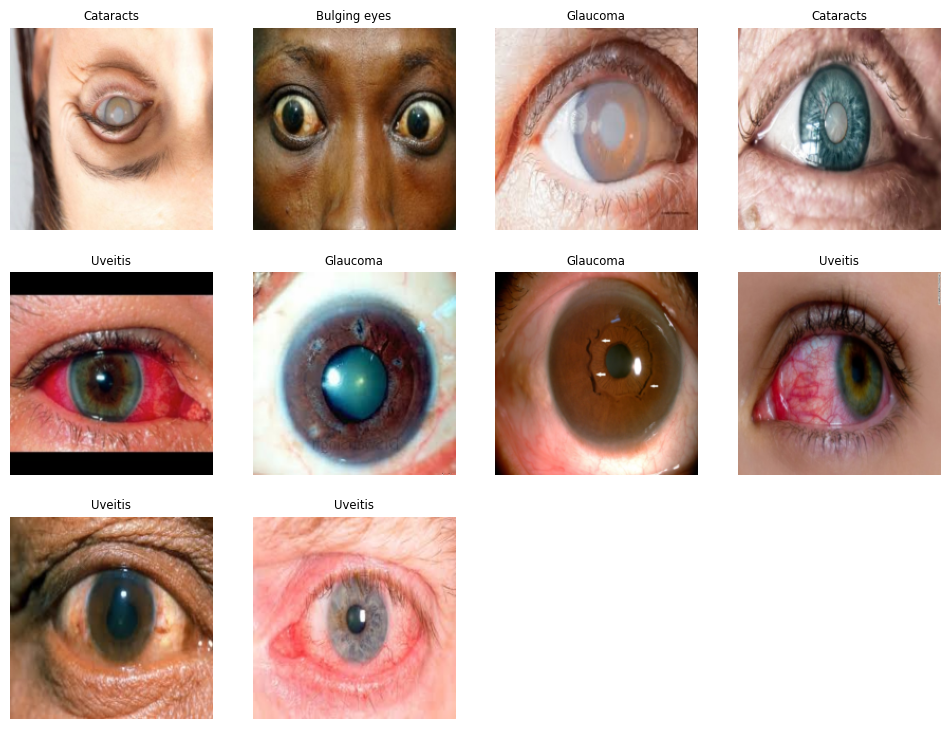

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=10)

In [ ]:
dls.vocab

['Bulging eyes', 'Cataracts', 'Crossed_Eyes', 'Glaucoma', 'Uveitis']

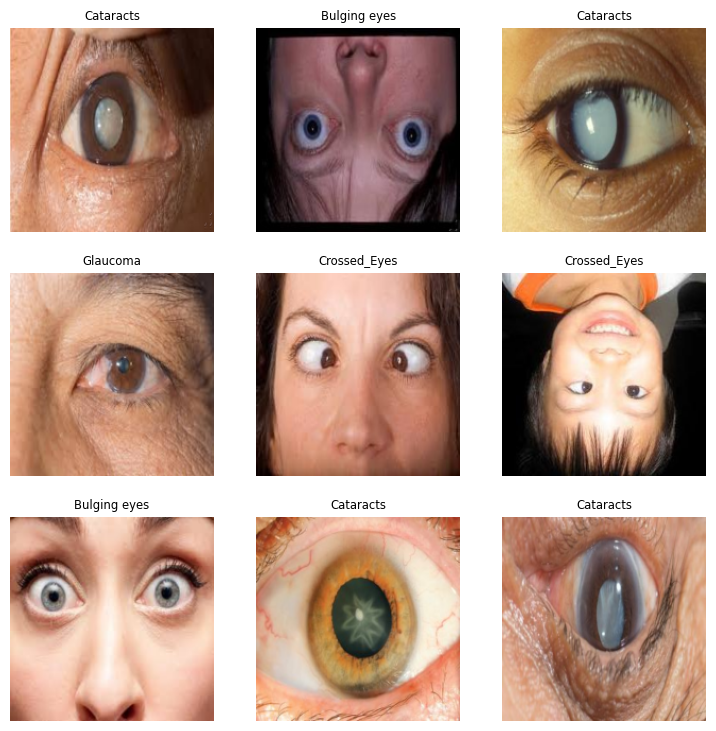

In [ ]:
blocks = (ImageBlock, CategoryBlock),
get_items = get_image_files,
splitter = RandomSplitter(valid_pct=0.2, seed=42),
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(50)

epoch,train_loss,valid_loss,accuracy,time
0,2.119964,0.792623,0.748299,00:20


epoch,train_loss,valid_loss,accuracy,time
0,0.813247,0.470187,0.823129,00:25
1,0.601783,0.357975,0.870748,00:23
2,0.457804,0.322073,0.877551,00:22
3,0.353055,0.324489,0.904762,00:23
4,0.275003,0.325995,0.904762,00:23
5,0.213081,0.318624,0.904762,00:22
6,0.169781,0.303660,0.911565,00:23
7,0.137413,0.291853,0.911565,00:24
8,0.111513,0.278552,0.918367,00:24
9,0.092237,0.334406,0.911565,00:23


In [ ]:
learn.summary()

Sequential (Input shape: 64 x 3 x 192 x 192)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 96 x 96   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 48 x 48   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

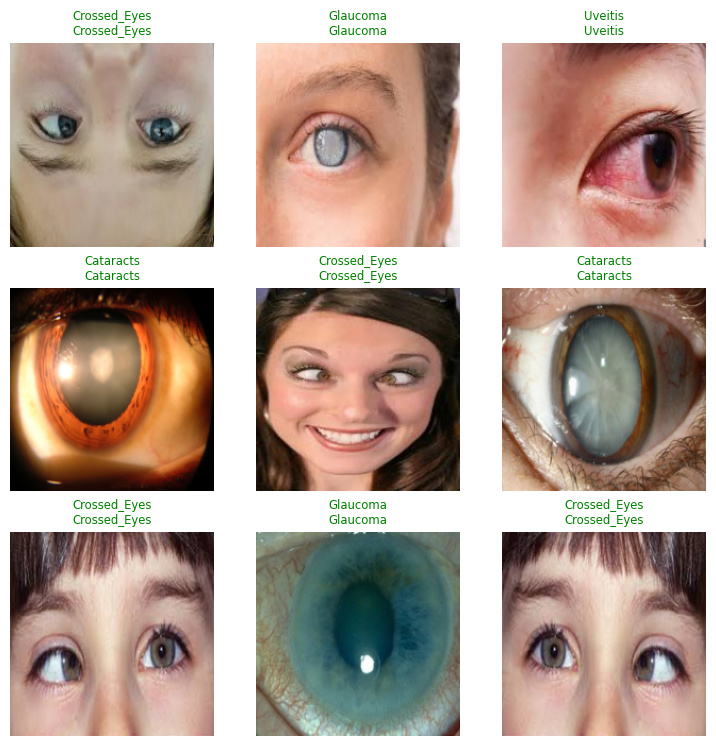

In [ ]:
learn.show_results()

SuggestedLRs(valley=0.0002290867705596611)

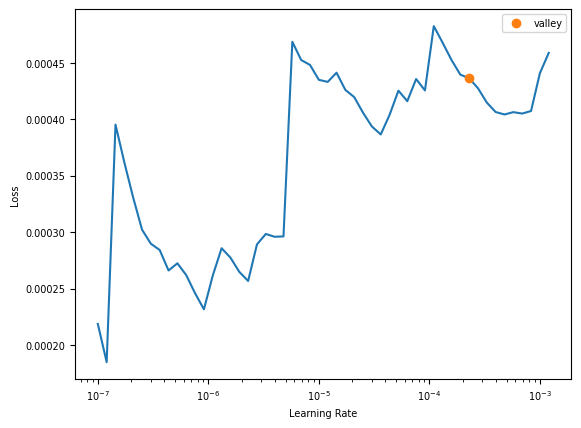

In [ ]:
learn.lr_find()

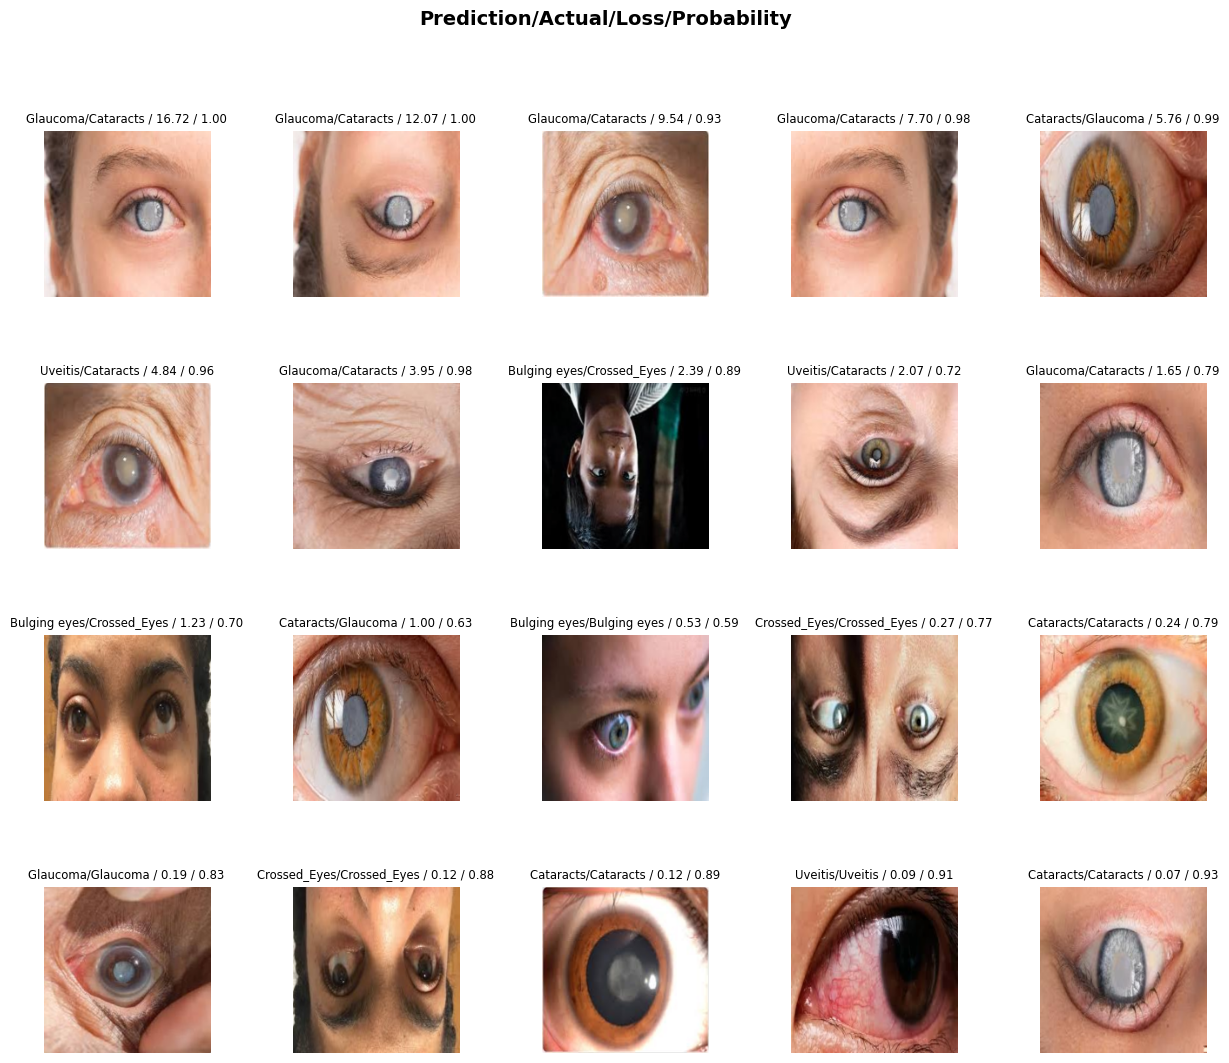

In [ ]:
import matplotlib.pyplot as plt

# Set font size for the entire plot
plt.rcParams['font.size'] = 7

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(20)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()